In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/Customer_Actions.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
print("Size of the dataset : ", df.shape)

Size of the dataset :  (350, 5)


#### 1. Age vs Purchasing behaviour

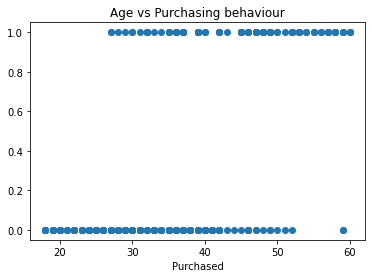

In [5]:
plt.scatter(df["Age"], df["Purchased"])
plt.title("Age vs Purchasing behaviour")
plt.xlabel("Age")
plt.xlabel("Purchased")
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
label_encoder = LabelEncoder() 
df["Gender_encoded"] = label_encoder.fit_transform(df["Gender"])

In [8]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_encoded
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [9]:
X = df[["Gender_encoded", "Age", "EstimatedSalary"]]
y = df["Purchased"]

####  Train-test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [12]:
print("Size of training data : ", X_train.shape[0])
print("Size of test data : ", X_test.shape[0])

Size of training data :  262
Size of test data :  88


#### Normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler  # when our 2 values has drastic changes it means age is 20 30 and estimatory is 1000 800

In [14]:
min_max = MinMaxScaler()
min_max.fit(X_train[["Age", "EstimatedSalary"]])
train_transformed = min_max.transform(X_train[["Age", "EstimatedSalary"]])
test_transformed = min_max.transform(X_test[["Age", "EstimatedSalary"]])
test_transformed

array([[0.21428571, 0.51111111],
       [0.26190476, 0.5037037 ],
       [0.5952381 , 0.87407407],
       [0.11904762, 0.03703704],
       [0.57142857, 0.42962963],
       [0.23809524, 0.12592593],
       [0.02380952, 0.08148148],
       [0.4047619 , 0.44444444],
       [0.0952381 , 0.48888889],
       [0.61904762, 0.17777778],
       [0.71428571, 0.77037037],
       [0.0952381 , 0.35555556],
       [0.45238095, 0.28148148],
       [0.28571429, 0.53333333],
       [0.19047619, 0.        ],
       [0.04761905, 0.4962963 ],
       [0.07142857, 0.39259259],
       [0.42857143, 0.33333333],
       [0.66666667, 0.6       ],
       [0.52380952, 0.31111111],
       [0.54761905, 0.27407407],
       [0.76190476, 0.15555556],
       [0.28571429, 0.25185185],
       [0.35714286, 0.99259259],
       [0.19047619, 0.        ],
       [0.73809524, 0.0962963 ],
       [0.26190476, 0.48148148],
       [0.4047619 , 0.25925926],
       [0.        , 0.27407407],
       [0.11904762, 0.0962963 ],
       [0.

In [15]:
X_train["Age_normalized"] = train_transformed[:,0]
X_train["EstimatedSalary_normalized"] = train_transformed[:,1]
X_train.head()

,Gender_encoded,Age,EstimatedSalary,Age_normalized,EstimatedSalary_normalized
66,1,24,19000,0.142857,0.029630
126,1,42,65000,0.571429,0.370370
12,1,20,86000,0.047619,0.525926
221,1,35,91000,0.404762,0.562963
316,0,54,104000,0.857143,0.659259


In [16]:
X_test["Age_normalized"] = test_transformed[:,0]
X_test["EstimatedSalary_normalized"] = test_transformed[:,1]
X_test.head()

,Gender_encoded,Age,EstimatedSalary,Age_normalized,EstimatedSalary_normalized
6,0,27,84000,0.214286,0.511111
52,0,29,83000,0.261905,0.503704
270,0,43,133000,0.595238,0.874074
45,1,23,20000,0.119048,0.037037
296,1,42,73000,0.571429,0.429630


### Fitting Logistic Regression models

#### Model 1 - Using Age only

In [17]:
from sklearn.linear_model import LogisticRegression   #use to calculate binary events yes no 0, 1

In [18]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train[["Age_normalized"]], y_train)

LogisticRegression()

In [19]:
predictions = logistic_model.predict(X_test[["Age_normalized"]])
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
print("Test data Accuracy :", logistic_model.score(X_test[["Age_normalized"]], y_test))

Test data Accuracy : 0.8295454545454546


In [22]:
train_predictions = logistic_model.predict(X_train[["Age_normalized"]])
print("Training data Accuracy : ", logistic_model.score(X_train[["Age_normalized"]], y_train))

Training data Accuracy :  0.8282442748091603


#### Model 2 - Using all normalized and encoded features 

In [23]:
logistic_model2 = LogisticRegression()
logistic_model2.fit(X_train[["Gender_encoded", "Age_normalized", "EstimatedSalary_normalized"]], y_train)

LogisticRegression()

In [24]:
predictions = logistic_model2.predict(X_test[["Gender_encoded", "Age_normalized", "EstimatedSalary_normalized"]])
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [25]:
print("Test data Accuracy : ",accuracy_score(y_test, predictions))

Test data Accuracy :  0.8409090909090909


In [26]:
train_predictions = logistic_model2.predict(X_train[["Gender_encoded", "Age_normalized", "EstimatedSalary_normalized"]])
print("Training data Accuracy : ",accuracy_score(y_train, train_predictions))

Training data Accuracy :  0.8549618320610687


#### Getting the probabilites

In [27]:
X_test[["Gender_encoded", "Age_normalized", "EstimatedSalary_normalized"]].iloc[0, :]

Gender_encoded                0.000000
Age_normalized                0.214286
EstimatedSalary_normalized    0.511111
Name: 6, dtype: float64

In [28]:
logistic_model2.predict_proba(X_test[["Gender_encoded", "Age_normalized", "EstimatedSalary_normalized"]].iloc[0, :].values.reshape(1,-1))

array([[0.83872664, 0.16127336]])

In [29]:
pred_probs=logistic_model2.predict_proba(X_test[["Gender_encoded", "Age_normalized", "EstimatedSalary_normalized"]])

#### Log Loss

In [30]:
from sklearn.metrics import log_loss

In [31]:
print("Model log loss : ", log_loss(y_test, pred_probs))

Model log loss :  0.3601701972105401


#### ROC-AUC Curve

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

In [33]:
fpr, tpr, thresholds = roc_curve(y_test,  pred_probs[:, 1])

In [34]:
print("Model AUC : ", roc_auc_score(y_test,  pred_probs[:, 1]))

Model AUC :  0.9123809523809523


#### Plotting ROC

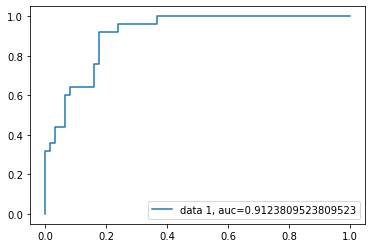

In [35]:
fpr, tpr, _ = roc_curve(y_test,  pred_probs[:, 1])
auc = roc_auc_score(y_test, pred_probs[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()